In [198]:
#import common libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import skew, skewtest, norm

In [199]:
train =pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [200]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [201]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [202]:
test.shape

(1459, 80)

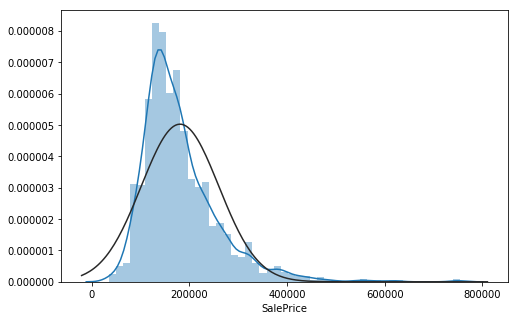

In [203]:
#Lets take a quick look at distribution of target variable-SalePrice
fig,ax = plt.subplots(figsize=(8,5))
sns.distplot(train['SalePrice'],fit=norm,ax=ax)

It is evident from above figure that skew is present in SalePrice.

In [204]:
print("Skew is: %f" % train['SalePrice'].skew())

Skew is: 1.882876


In [205]:
#log transform the target
train['SalePrice'] = np.log1p(train['SalePrice'])


In [206]:
train['SaleCondition'].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

Text(0.5,0,'Living Area')

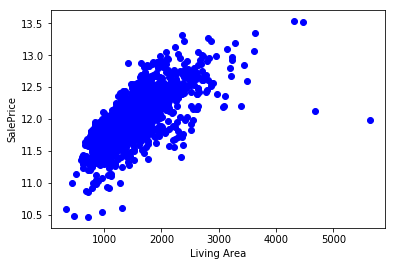

In [207]:
#Let's look at SalePrice vs living area
plt.scatter(train['GrLivArea'],train['SalePrice'],color='blue')
plt.ylabel('SalePrice')
plt.xlabel('Living Area')

We can see from above plot that some outliers are present as for some large living area, 
the price is very low.

In [208]:
#let's remove outliers
train = train[train['GrLivArea']<4500]

In [209]:
#function to find average price by feature passed as input
def avgprice(grpby) :
    avgprc = pd.DataFrame(train['SalePrice'].groupby(train[grpby]).agg('mean'))
    return avgprc

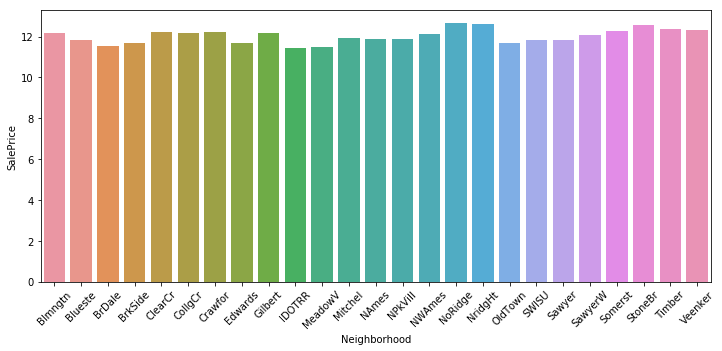

In [210]:
#let's check average saleprice with respect to neighborhood
#avgprice = pd.DataFrame(train['SalePrice'].groupby(train['Neighborhood']).agg('mean'))
#type(avgprice)
fig,ax = plt.subplots(figsize=(12,5))
plt.setp(ax.get_xticklabels(), rotation=45)
sns.barplot(x=avgprice('Neighborhood').index,y=avgprice('Neighborhood')['SalePrice'],ax=ax)



Above plot shows that house prices in Northridge, Northridge Heights & Stone Brook area are
comparitively higher than other areas.

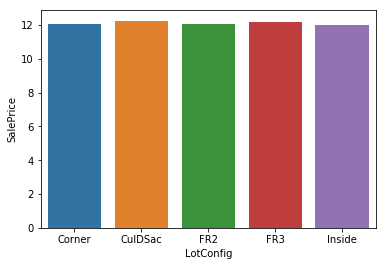

In [211]:
#Let's explore the saleprice of house with yearbuilt
#avgprice_conf = pd.DataFrame(train['SalePrice'].groupby(train['LotConfig']).agg('mean'))
sns.barplot(x=avgprice('LotConfig').index,y=avgprice('LotConfig')['SalePrice'])



The average SalePrice of houses with lotconfig Cul-De-Sac(closed end street) and 
FR3(3 side road facing) are significantly higher than others.

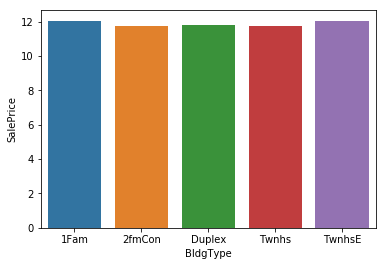

In [212]:
#lets find the impact of building type on average saleprice
sns.barplot(x=avgprice('BldgType').index,y=avgprice('BldgType')['SalePrice'])

SalePrice of building type 1Family detached and Townhouse Inside unit is higher than others.

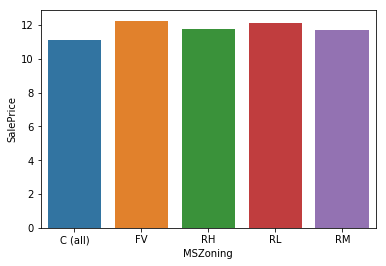

In [213]:
#lets explore the relationship between zoning classification(MSZoning) and SalePrice
sns.barplot(x=avgprice('MSZoning').index,y=avgprice('MSZoning')['SalePrice'])

We can see that low density residential areas and floating village residential areas have higher
average saleprice as compared to other zoning classifications.

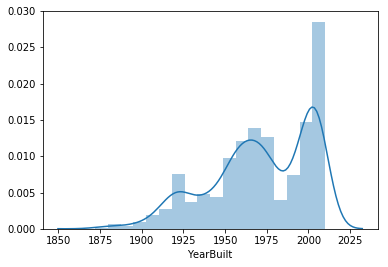

In [214]:
sns.distplot(train['YearBuilt'])

Here we can see that number of houses built started increasing from around 1950 till 2005-06 and 
after that it started decreasing sharply after 2008 probably due to worldwide economic crisis.

## Handle Missing Values

In [215]:
combined = pd.concat((train.loc[:,'MSSubClass' :'SaleCondition'],test.loc[:,'MSSubClass' :'SaleCondition']))

In [216]:
#Pick the first one - LotFrontage
combined['LotFrontage'].value_counts()

60.0     276
80.0     137
70.0     133
50.0     117
75.0     105
65.0      93
85.0      76
21.0      50
24.0      49
63.0      47
78.0      46
90.0      46
68.0      44
64.0      43
74.0      39
72.0      39
73.0      33
62.0      31
52.0      28
100.0     28
82.0      28
79.0      28
51.0      27
59.0      27
57.0      26
66.0      26
76.0      25
53.0      24
55.0      24
43.0      23
        ... 
122.0      2
116.0      2
149.0      2
150.0      2
174.0      2
155.0      1
123.0      1
135.0      1
111.0      1
117.0      1
131.0      1
200.0      1
22.0       1
136.0      1
28.0       1
31.0       1
25.0       1
313.0      1
133.0      1
126.0      1
152.0      1
168.0      1
144.0      1
138.0      1
137.0      1
182.0      1
119.0      1
195.0      1
153.0      1
141.0      1
Name: LotFrontage, Length: 128, dtype: int64

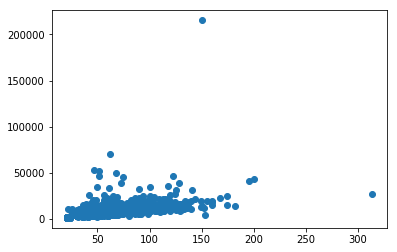

In [217]:
plt.scatter(combined['LotFrontage'],combined['LotArea'])

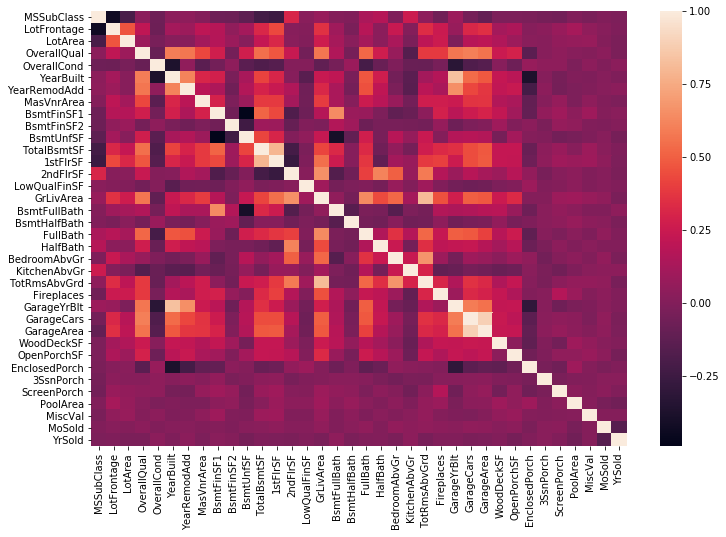

In [218]:
fig,ax = plt.subplots(figsize=(12,8))
sns.heatmap(combined.corr(),ax=ax)

In [219]:
combined = pd.get_dummies(combined)
combined = combined.fillna(combined.mean())

In [220]:
X_train = combined[:train.shape[0]]
X_test = combined[train.shape[0]:]
y_train=train['SalePrice']

In [221]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,1,0,0,0,0,1,0


In [222]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,SGDRegressor,ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold,cross_val_predict,cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import xgboost as xgb
import lightgbm as lgb


In [228]:
n_folds = 5
def rmse_cv(model):
    #kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 10))
    return(rmse)

In [229]:
#linear regression
lr =LinearRegression()
# scores = cross_val_score(lr, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
# rmse_scores = np.sqrt(-scores)
print(rmse_cv(lr).mean())

0.123050362147


In [230]:
#Ridge regression
rr = Ridge(alpha=0.2,normalize=True)
# rr.fit(X_train,y_train)
# scores = cross_val_score(rr, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
# rmse_scores = np.sqrt(-scores)
print(rmse_cv(rr).mean())

0.115295000178


In [231]:
#Lasso regression
lsr = Lasso(alpha=0.001)
# lsr.fit(X_train,y_train)
# scores = cross_val_score(lsr, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
# rmse_scores = np.sqrt(-scores)
print(rmse_cv(lsr).mean())


0.1124571692


In [30]:
# Seperate out numeric and categorical feature standard scaling
cols = train.loc[:,'MSSubClass' :'SaleCondition'].columns
cols_scale = []
# def str_column_to_float(dataset, column):
#        for row in dataset:
#           if (row[column] = float(row[column].strip())
for col in cols :
    if train[col].dtypes != 'O' :
        cols_scale.append(col)

cols_noscale = list(set(X_train.columns).symmetric_difference(set(cols_scale)))
#X_train['SaleType_New'].unique()
#type([0,1])
#train['PoolQC'].dtypes


In [177]:
#SGD regression
sgd = SGDRegressor(random_state=0,max_iter=300,alpha=0.02,penalty='elasticnet',l1_ratio=0.1,
                   power_t=0.4)
#X_train1 = pd.DataFrame(StandardScaler().fit_transform(X_train),columns=list(X_train.columns))
X_train1 = pd.DataFrame(StandardScaler().fit_transform(X_train[cols_scale]),columns=cols_scale)
X_train2 = pd.concat([X_train1.reset_index(drop=True),X_train[cols_noscale].reset_index(drop=True)],axis=1)

#y_train1 = StandardScaler().fit_transform(y_train)
sgd.fit(X_train1,y_train)
scores = cross_val_score(sgd,X_train1,y_train,scoring='neg_mean_squared_error',cv=10)
rmse_scores = np.sqrt(-scores)
print(rmse_scores.mean())

0.127296198897


In [232]:
#GradientBoosting Regressor
gdb = GradientBoostingRegressor(n_estimators=400,max_features='sqrt',alpha=0.9)
# gdb.fit(X_train,y_train)
# scores = cross_val_score(gdb, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
# rmse_scores = np.sqrt(-scores)
print(rmse_cv(gdb).mean())


0.115033197198


In [233]:
#RandomForest regressor
rfr = RandomForestRegressor(n_estimators=100)
# rfr.fit(X_train,y_train)
# scores = cross_val_score(rfr, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
# rmse_scores = np.sqrt(-scores)
print(rmse_cv(rfr).mean())

0.136183142661


In [234]:
#ElasticNet Regressor
elnr = ElasticNet(alpha=0.001,l1_ratio=0.3,max_iter=3000)
# elnr.fit(X_train,y_train)
# scores = cross_val_score(elnr, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
# rmse_scores=np.sqrt(-scores)
print(rmse_cv(elnr).mean())

0.110800368979


In [76]:
#Kernel-ridge
krr = KernelRidge(alpha=0.6,degree=2,kernel='polynomial',coef0=2.7)
krr.fit(X_train1,y_train)
scores = cross_val_score(krr, X_train1, y_train, scoring="neg_mean_squared_error", cv=10)
rmse_scores=np.sqrt(-scores)
print(rmse_scores.mean())


0.128186867791


In [235]:
#Xgb regressor
xgbr = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
# xgbr.fit(X_train,y_train)
# scores = cross_val_score(xgbr, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
# rmse_scores=np.sqrt(-scores)
print(rmse_cv(xgbr).mean())

0.113766366826


In [236]:
#lightgbm regressor
lgbr = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=700,
                              max_bin = 55, bagging_fraction = 0.4,
                              bagging_freq = 5, feature_fraction = 0.23,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
# lgbr.fit(X_train,y_train)
# scores = cross_val_score(lgbr, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
# rmse_scores=np.sqrt(-scores)
print(rmse_cv(lgbr).mean())

0.112646145673


In [250]:
#function to take average of lasso, LightGBM ,XGB and ElasticNet
def averaging_model(model1,model2,model3,model4):
    model1.fit(X_train,y_train)
    model2.fit(X_train,y_train)
    model3.fit(X_train,y_train)
    model4.fit(X_train,y_train)
    pred1 = model1.predict(X_test)
    pred2 = model2.predict(X_test)
    pred3 = model3.predict(X_test)
    pred4 = model4.predict(X_test)
    prediction = pd.DataFrame()
    prediction['pred1'] = pred1
    prediction['pred2'] = pred2
    prediction['pred3'] = pred3
    prediction['pred4'] = pred4
    prediction = np.mean(prediction,axis=1)
    return prediction

In [251]:
pred = averaging_model(lsr,lgbr,xgbr,elnr)


In [252]:
test['SalePrice'] =np.expm1(pred) #convert back from log to normal SalePrice
output = test[['Id','SalePrice']]
output.to_csv('output.csv',index=False)